<a href="https://colab.research.google.com/github/saima8/Data-Science-from-scratch/blob/main/PCA_practice_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note**

Eigenvalue for a newline-
The sum of squares of the distances between the points projected onto the line and the origin.

In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
genes = ['gene' + str(i) for i in range(1,101)] # created an array of 100 genes

In [4]:
wt = ['wt' + str(i) for i in range(1,6)] #arrays of sample 
ko = ['ko' + str(i) for i in range(1,6)] # 2 different type - wild and knock ou

In [6]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
#the * unpacks the wt and ko arrays so that the column names are a single array

In [7]:
for gene in data.index:
  data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,100), size=5)
  data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,100), size=5)

  #create the random data

In [9]:
print(data.head())
print(data.shape)

      wt1 wt2 wt3 wt4  wt5 ko1 ko2 ko3  ko4 ko5
gene1  20  31  26  27   18  79  82  90   81  75
gene2  91  95  82  90  111  18  20  17   30  16
gene3  14  15   8  17   13  61  50  57   65  50
gene4  77  69  86  84   71  33  31  23   25  29
gene5  41  35  43  34   37  95  92  98  103  90
(100, 10)


In [11]:
#Before doing PCA, center and scale the data
#centering, mean will be 0 and scaling, std will be 1

scaled_data = preprocessing.scale(data.T)
#using transpose, because the scale function expects the samples to be in rows instead of columns

In [12]:
# alternatively we could use... standardscale and .fit_transform

In [13]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [15]:
#calculate the percentage of variation that each principal component accounts for

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

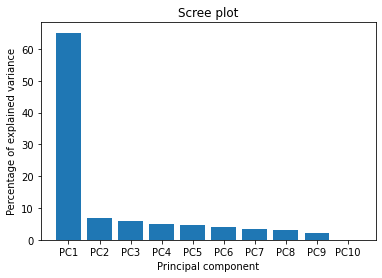

In [17]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal component')
plt.title('Scree plot')
plt.show()

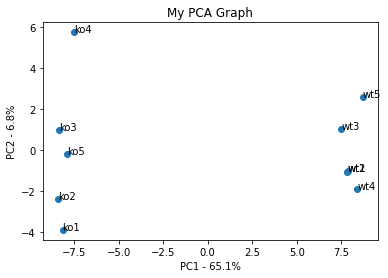

In [19]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
  plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

In [20]:
#Let's look at the loading scores for PC1 to determine which genes had the largest influence on separating the two clusters along the x-axis

In [21]:
loading_scores = pd.Series(pca.components_[0], index=genes)
# The Pcs are zero-indexed, so PC1 = 0
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

top_10_genes = sorted_loading_scores[0:10].index.values

print(loading_scores[top_10_genes])

gene89    0.123225
gene16   -0.122924
gene21    0.122768
gene5    -0.122627
gene12    0.122588
gene1    -0.122496
gene81   -0.122291
gene75    0.122193
gene18   -0.122157
gene2     0.122121
dtype: float64


In [22]:
# These values are super similar, so a lot of genes played a role in separating the samples,rather than just one or two